<a href="https://colab.research.google.com/github/min02yam/DGU-data-mining/blob/main/k-means%EB%A5%BC%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EA%B3%A0%EA%B0%9D%20%EC%84%B8%EB%B6%84%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **k-means를 활용한 고객 세분화**


1. Kaggle API 연결
2. 라이브러리 및 데이터 로드
3. 탐색 및 시각화<BR>
    3-1. 판다스 프로파일링<BR>
    3-2. 시각화

4. K-Means 클러스터링
5. 클러스터 시각화<BR>
  5-1. 클러스터 경계<BR>
  5-2. 3D 플랏

# 1. Kaggle API 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_USERNAME']='min02yam'
os.environ['KAGGLE_KEY']='_*_*_'

In [3]:
!kaggle -h #확인

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions (c)    Commands related to Kaggle competitions
    datasets (d)        Commands related to Kaggle datasets
    kernels (k)         Commands related to Kaggle kernels
    config              Configuration settings


In [4]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 794kB/s]


In [5]:
!unzip "customer-segmentation-tutorial-in-python.zip"

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


# 2. 라이브러리 및 데이터 로드

In [6]:
import numpy as np 
import pandas as pd #전처리

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go #시각화

from sklearn.cluster import KMeans #클러스터링

import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [15]:
df = pd.read_csv('/content/Mall_Customers.csv')

# 3. 데이터 탐색 및 시각화

## 3-1. 판다스 프로파일링

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [10]:
from pandas_profiling import ProfileReport

In [16]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':False}})

In [17]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
profile.to_file(output_file="REPORT.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3-2. 시각화

In [22]:
# 1. 옵션 설정
plt.style.use("fseaborn-notebook")
# 2. 세 가지 필드 추출 
cols=df.columns[2:].tolist() ; cols

나이(Age) , 연소득(Annual Income) ,지출(Spending Score) 관계

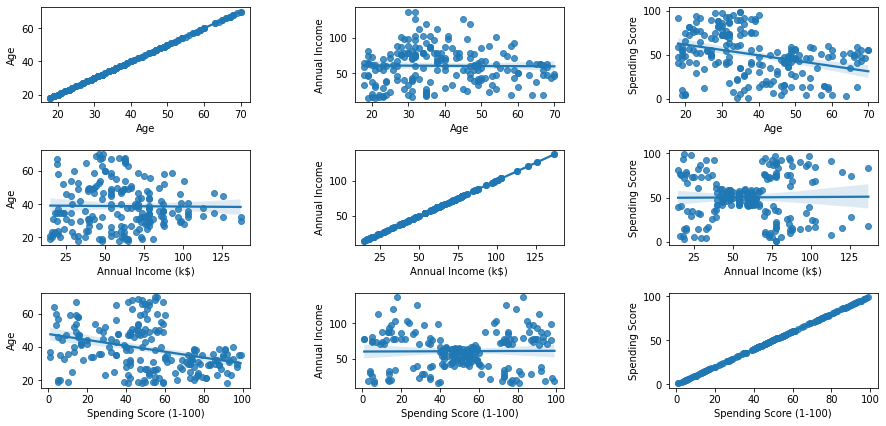

In [20]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

`성별(Gender)`에 따른 나이(aAge), 연간 소득(Annual Income ), 지출(Spending Score) 값의 분포

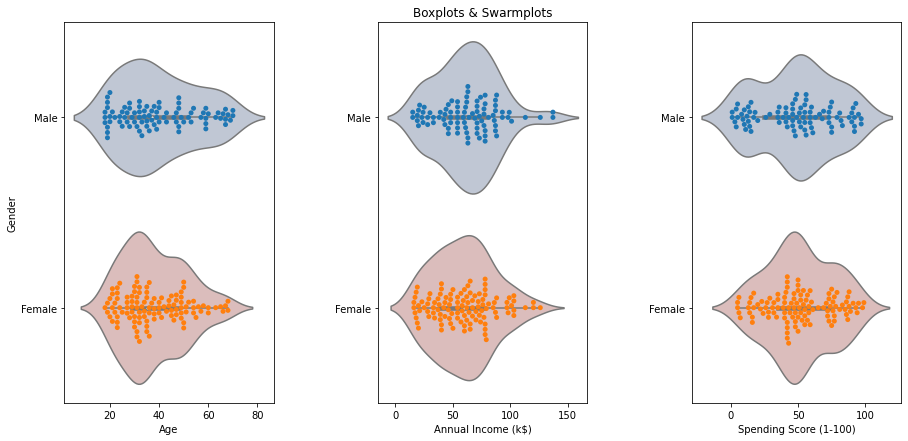

In [19]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# 4. K-means 클러스터링

### 4-1. 나이(Age)와 지출(Spending Score)을 활용한 세분화

https://programmer.ink/think/plot-pandas-sklearn-shoot-the-first-shot-of-kaggle.html